<a href="https://colab.research.google.com/github/hossein20s/PPG2bloodPressure/blob/master/PPG2BloodPressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
REPO_NAME = 'PPG2bloodPressure'
%run gdrive/My\ Drive/lib/connect.ipynb


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Vesion:1.4
mkdir: cannot create directory ‘/content/gdrive/My Drive/src/’: File exists
Cloning into 'PPG2bloodPressure'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 249 (delta 68), reused 72 (delta 25), pack-reused 92
Rec

In [6]:
BUCKET_DIR = 'gs://medicalblockchain_dev'
!gsutil cp $BUCKET_DIR/data/BP_PPG_ECG/Part_1.mat /tmp/data1.mat

Copying gs://medicalblockchain_dev/data/BP_PPG_ECG/Part_1.mat...
/ [1 files][811.9 MiB/811.9 MiB]                                                
Operation completed over 1 objects/811.9 MiB.                                    


Some data can also be found here. No Idea the realtionship
https://drive.google.com/drive/u/0/mobile/folders/154j5jxudI3PAvPDjPiscs-P3Q5ZRpq5t?usp=drive_open

Maybe figure it out from 
https://sites.google.com/view/cufflessbp/dataset?authuser=0


In [8]:
import h5py
import numpy as np

with h5py.File('/tmp/data1.mat', 'r') as f:
  print(list(f.keys()))
  ds = f['Part_1']
  print(ds.shape)
  x = ds[0][0]
  #print(x.dtype)
  print(f[x].shape)
  print(f[x].dtype)
  ppg_abp_ecg = f[x][:]
  print(ppg_abp_ecg.shape)
  


['#refs#', 'Part_1']
(3000, 1)
(61000, 3)
float64
(61000, 3)


In [0]:
ppg = ppg_abp_ecg[:,0]
abp = ppg_abp_ecg[:,1]
ecg = ppg_abp_ecg[:,2]
  

In [0]:
  print(ppg_abp_ecg)
  
  import numpy as np
  n = 300
  x = np.arange(n)
  
  import matplotlib.pyplot as plt
  plt.plot(x, ppg[i:i+n], 'y')
  plt.show()
  plt.plot(x, abp[i:i+n], 'b')
  plt.show()
  plt.plot(x, ecg[i:i+n], 'g')
  plt.show()

  n = 300
  i = 0
  plt.plot(ppg[i:i+n], abp[i:i+n], 'y')
  plt.show()
  plt.plot(ecg[i:i+n], abp[i:i+n], 'g')
  plt.show()
  plt.plot(ecg[i:i+n], ppg[i:i+n], 'o')
  plt.show()

  n = 1000
  plt.plot(ppg[i:i+n], abp[i:i+n], 'y')
  plt.show()
  n = 4000
  plt.plot(ppg[i:i+n], abp[i:i+n], 'y')
  plt.show()
  n = 20000
  plt.plot(ppg[i:i+n], abp[i:i+n], 'y')
  n = 300
  i = 1000
  plt.plot(ppg[i:i+n], abp[i:i+n], 'y')
  plt.show()
  i = 10000
  plt.plot(ppg[i:i+n], abp[i:i+n], 'y')
  plt.show()
  plt.plot(ecg[i:i+n], abp[i:i+n], 'g')
  plt.show()
  i = 20000
  plt.plot(ppg[i:i+n], abp[i:i+n], 'y')
  plt.show()



# red dashes, blue squares and green triangles
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')


# Prediction

lets predict 1000 timeslice from the first 6000 one.
First we create a dataframe from the first 7000 

In [0]:
import numpy as np
import pandas as pd
n = 7000
index = np.arange(n)
columns = ['PPG', 'ABP']
df = pd.DataFrame(index=index, columns=columns)

df['PPG'] = ppg[0:n]
df['ABP'] = abp[0:n]


In [0]:
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)

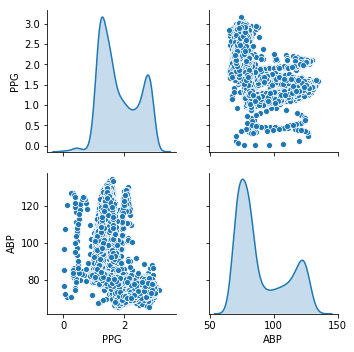

In [22]:
import seaborn as  sns
sns.pairplot(train[['PPG', 'ABP']], diag_kind='kde')

In [31]:
train_dataset = train.copy()
test_dataset = test.copy()
print(train_dataset.describe())

train_stats = train.describe()
train_stats.pop("ABP")
train_stats = train_stats.transpose()
print(train_stats)

train_labels = train_dataset.pop('ABP')
test_labels = test_dataset.pop('ABP')


               PPG          ABP
count  5600.000000  5600.000000
mean      1.840672    90.512198
std       0.634207    19.409505
min       0.013685    64.913815
25%       1.302786    74.780324
50%       1.646139    81.716186
75%       2.433040   108.629288
max       3.165200   134.565507
      count      mean       std       min       25%       50%      75%     max
PPG  5600.0  1.840672  0.634207  0.013685  1.302786  1.646139  2.43304  3.1652


Normalize the data

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Building Densly Connected Model

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [0]:
def build_2DenslyConnectedModel():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [39]:
model = build_2DenslyConnectedModel()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


Check to be sure the formats are correct

In [43]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12626208],
       [ 0.0135612 ],
       [-0.18720323],
       [-0.00179082],
       [ 0.00589787],
       [ 0.01394966],
       [ 0.01038286],
       [-0.07388456],
       [ 0.01899972],
       [ 0.05000627]], dtype=float32)

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [58]:
EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [59]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
1995,133.821577,8.016082,133.821548,126.508150,8.071599,126.508163,1995
1996,133.572779,8.039938,133.572769,126.709385,7.998335,126.709373,1996
1997,134.019572,8.023061,134.019608,124.111017,7.793882,124.111023,1997
1998,133.904492,7.988784,133.904510,127.082059,8.002699,127.082047,1998
1999,133.667704,7.990962,133.667694,124.426003,7.789375,124.426003,1999


In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

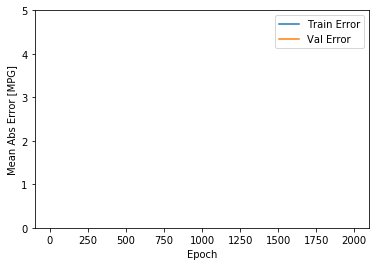

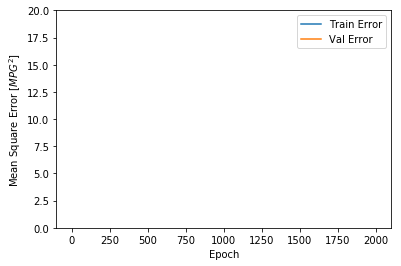

In [60]:
plot_history(history)

In [61]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  8.18 MPG


# Finally Prediction

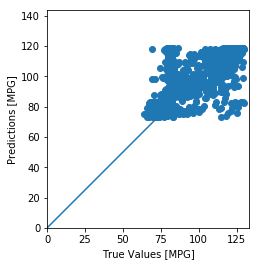

In [62]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

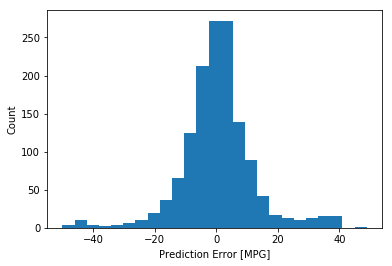

In [63]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")